<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/Flight_Passengers_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight-Passengers-Satisfaction**

# **1. Introduction**


**Your client for this project is an Airline Company.**


*   Due to **fierce** competition in the airline industry, the airline company needs to focus on the passenger’s experience and satisfaction.
*   **Customer feedback**, in particular, is critical since it is an outcome **measurement** for business performance.



*   So, they need to analyze the data of the passenger's travel history.
One of the key measurements in this process is whether the passenger feels satisfied or not.
*   Current Scenario: 
Currently, they have a manual process to analyze the customer satisfaction based on the number of feedback and complaint mail that they receive.



# **2. Problem Statement**
**The current process suffers from the following problems:**

*   Analyzing the data of passengers manually and to understand whether a passenger is satisfied or not is a tedious task.
*   This process needs to be repeated every time they receive some feedback.

The company has hired you as data science consultants.

They want to **automate** the process of **predicting** the passenger satisfaction based on the travel history data collected by the airline company.

**Your Role**
*   You are given a dataset containing the answer of different questions asked as the feedback.
*   Your task is to build a classification model using the dataset.
*   Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [101]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")

# **4. Data Acquisition & Description**

In [102]:
data=pd.read_csv("/content/drive/MyDrive/TermProjects/Flight-Passengers-Satisfaction-Prediction/cust_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/TermProjects/Flight-Passengers-Satisfaction-Prediction/cust_test.csv")
data.head()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,...,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,...,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,...,1,5,5,2,3,2,1,0,0.0,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,...,5,5,5,5,4,5,5,10,2.0,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,...,2,4,3,5,3,5,2,0,0.0,satisfied


### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.




In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [104]:
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,82872.000000
mean,64971.539574,39.351106,1190.686753,2.732553,3.062269,2.756385,2.978057,3.205286,3.252842,3.442790,3.362992,3.383636,3.351407,3.634313,3.308194,3.643865,3.291351,14.714556,15.063121
std,37465.886717,15.099487,998.640016,1.329950,1.526983,1.401047,1.279064,1.330482,1.350905,1.318317,1.331880,1.287778,1.313365,1.178930,1.264747,1.173351,1.313560,38.108874,38.475487
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32552.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64864.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97430.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [105]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html',)
# print('Accomplished!')

**Check null value or any other inconsistent value in column**

In [106]:
print((data=="").sum(), "\n")

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64 



In [107]:
print(data.isna().sum(), "\n")


id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             251
satisfaction                           0
dtype: int64 



In [108]:
print((data=="Unknown").sum(), "\n")


id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64 



In [109]:
print((data==0).sum(), "\n")

id                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 2487
Departure/Arrival time convenient     4237
Ease of Online booking                3604
Gate location                            1
Food and drink                          88
Online boarding                       1959
Seat comfort                             1
Inflight entertainment                   9
On-board service                         1
Leg room service                       371
Baggage handling                         0
Checkin service                          1
Inflight service                         1
Cleanliness                              9
Departure Delay in Minutes           46977
Arrival Delay in Minutes             46553
satisfactio

### **5.2 Data Cleaning**

- Now we will perform all the necessary operations that are required to clean and rectify the schema of the dataset.

In [110]:
colToImpute=["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
"Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
"Checkin service","Inflight service","Cleanliness"]
for col in colToImpute:
  data[col]=data[col].replace(0,data[col].mode()[0])

print((data==0).sum(), "\n") 

data["Arrival Delay in Minutes"]=data["Arrival Delay in Minutes"].replace(np.nan,data["Arrival Delay in Minutes"].mean())
dataValidation["Arrival Delay in Minutes"]=dataValidation["Arrival Delay in Minutes"].replace(np.nan,data["Arrival Delay in Minutes"].mean())

print(data["Arrival Delay in Minutes"].isna().sum(), "\n")

data.satisfaction=data.satisfaction.replace(["neutral or dissatisfied","satisfied"],[0,1])
dataValidation.satisfaction=data.satisfaction.replace(["neutral or dissatisfied","satisfied"],[0,1])



id                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                    0
Departure/Arrival time convenient        0
Ease of Online booking                   0
Gate location                            0
Food and drink                           0
Online boarding                          0
Seat comfort                             0
Inflight entertainment                   0
On-board service                         0
Leg room service                         0
Baggage handling                         0
Checkin service                          0
Inflight service                         0
Cleanliness                              0
Departure Delay in Minutes           46977
Arrival Delay in Minutes             46553
satisfactio

### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

### **Check distribution of numerical features**

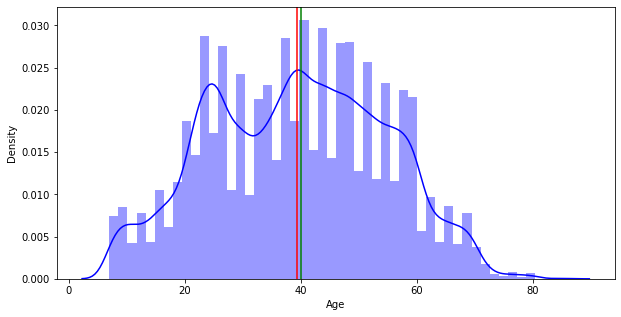

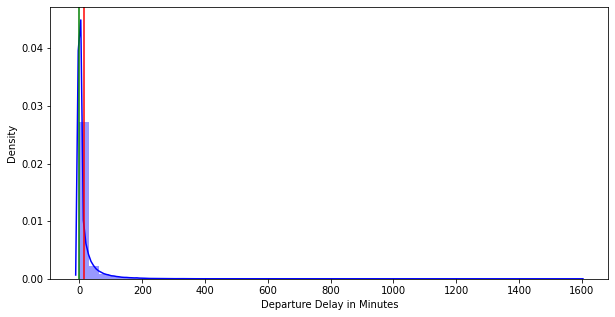

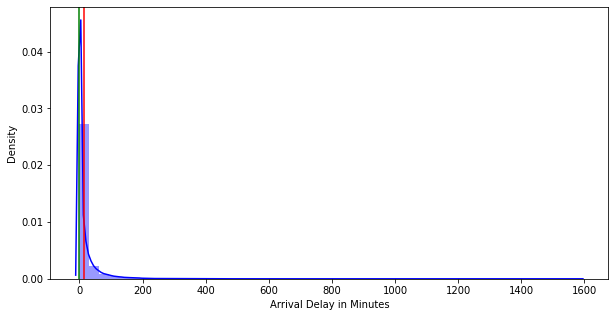

In [111]:
Contcolumn=["Age","Departure Delay in Minutes", "Arrival Delay in Minutes"]

for col in Contcolumn:  
  fig=plt.figure(figsize=[10,5])
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")

### **Check the frequency of catrgorical features**

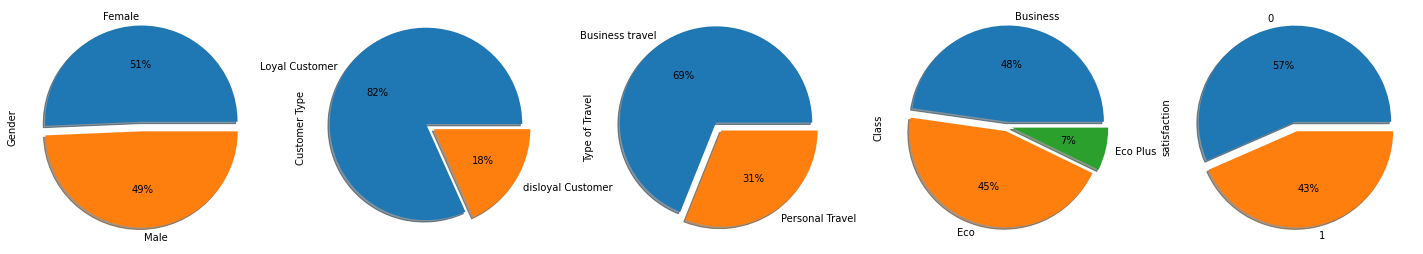

In [112]:
CatColumn=["Gender","Customer Type","Type of Travel","Class","satisfaction"]
fig=plt.figure(figsize=[25,10])

for col in CatColumn:  
  plt.subplot(1,len(CatColumn),(CatColumn.index(col))+1)
  space = np.ones(data[col].nunique())/20
  data[col].value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)


### **Analize Avg Rating of different Services**

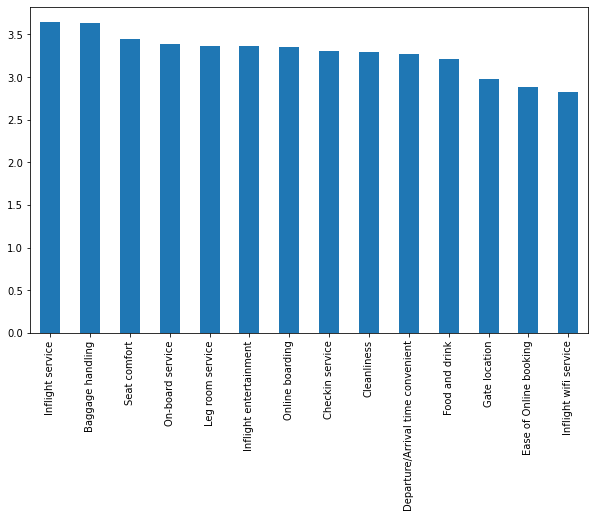

In [113]:
fig=plt.figure(figsize=[15,7])
data[["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
"Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service","Baggage handling",
"Checkin service","Inflight service","Cleanliness"]].mean().sort_values(ascending=False).plot.bar(figsize=[10,6])


### **Analyze Service Rating by Different Segment of Customers**

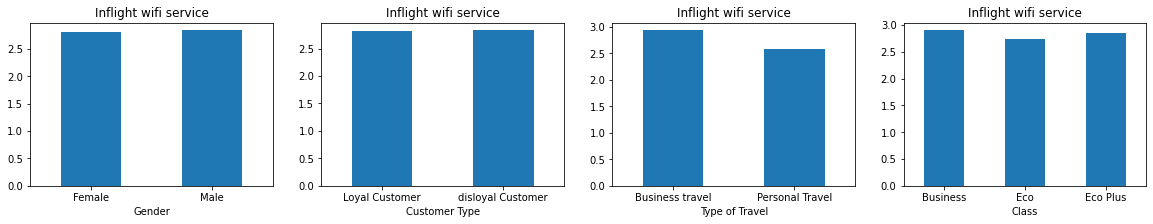

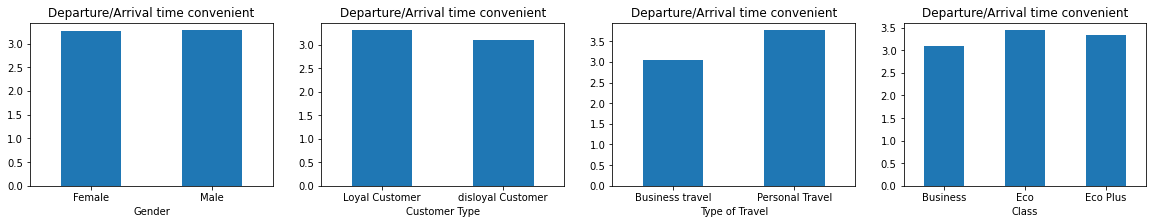

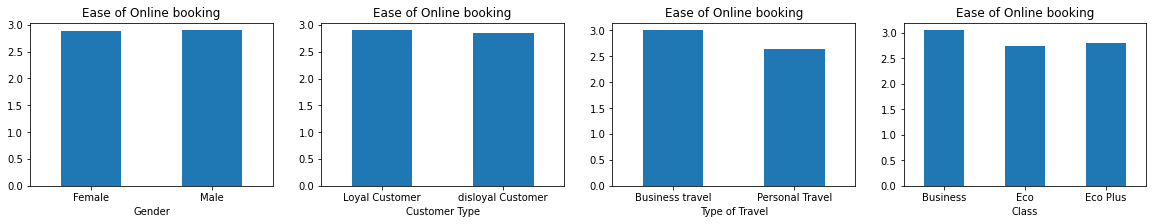

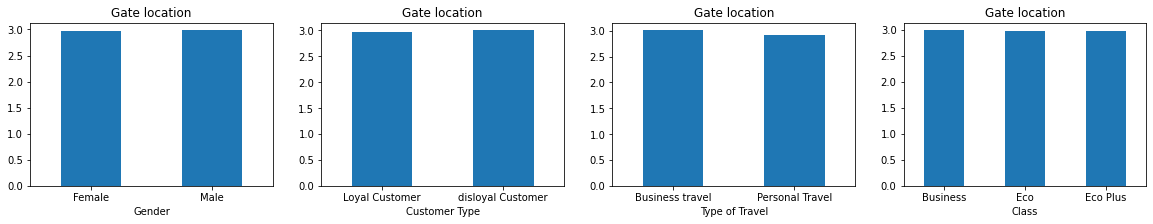

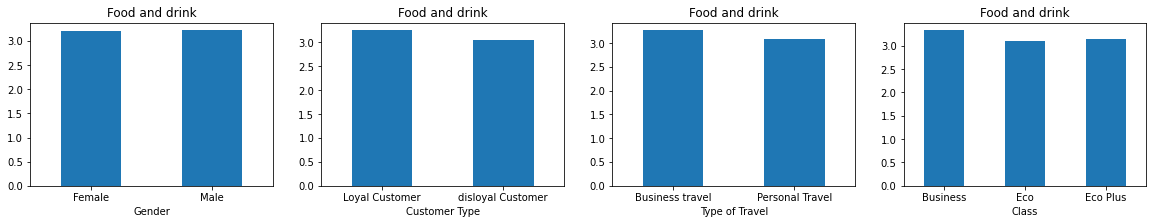

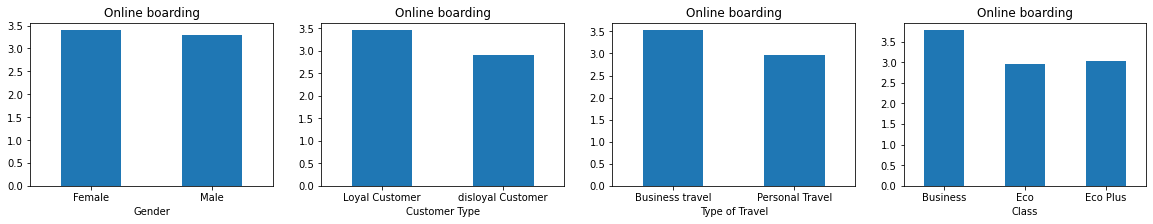

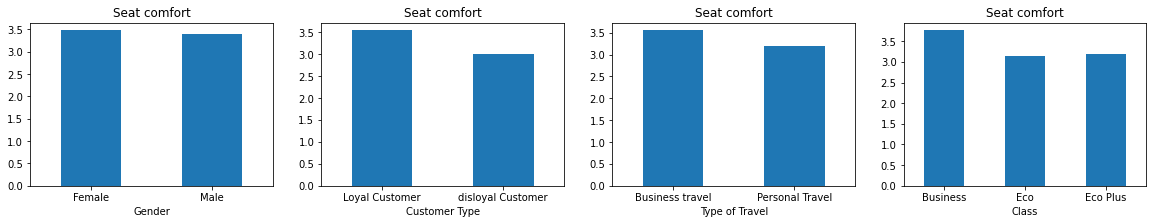

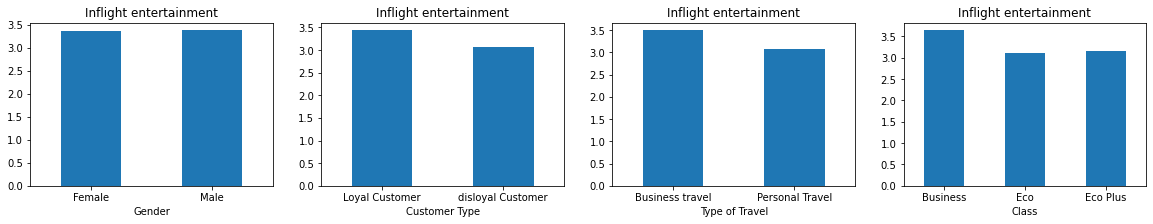

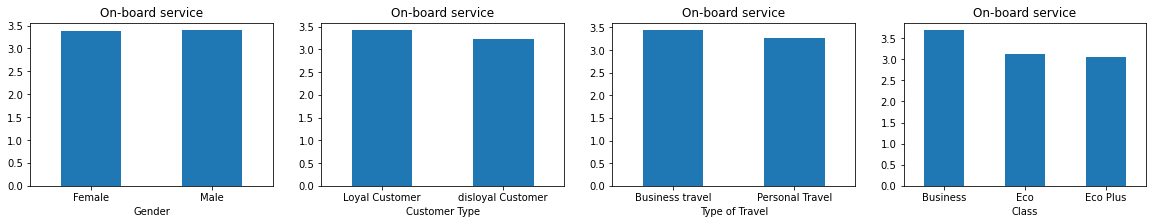

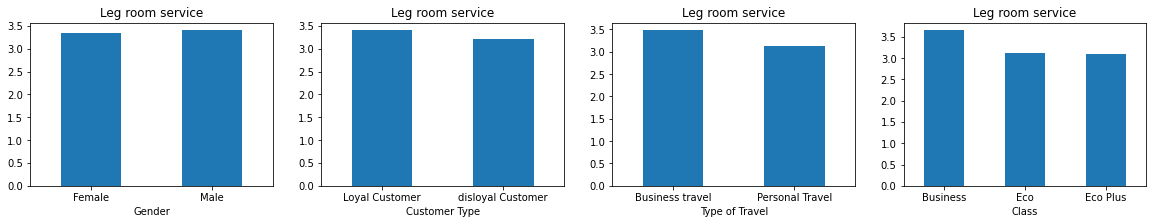

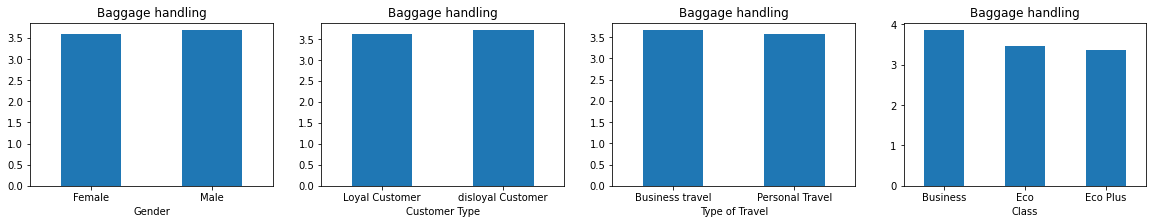

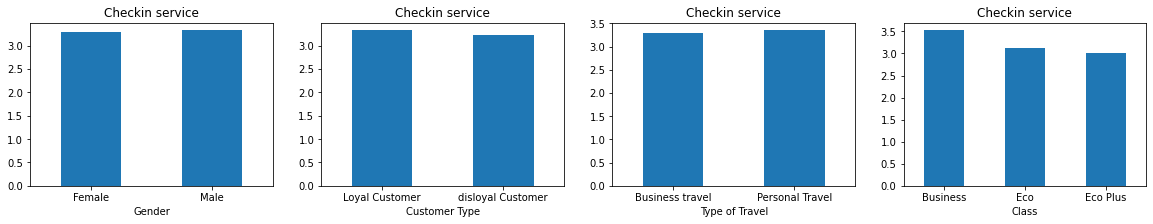

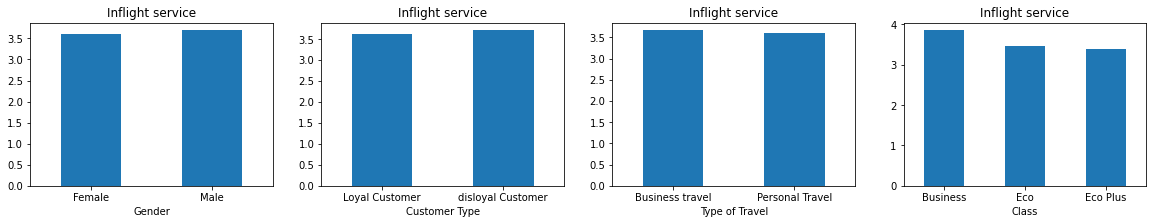

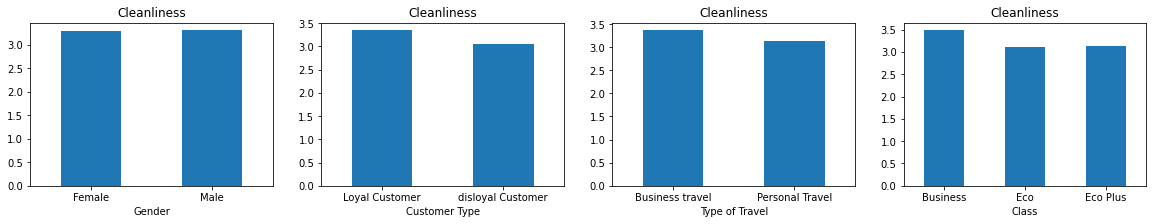

In [114]:
services=["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
"Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service","Baggage handling",
"Checkin service","Inflight service","Cleanliness"]

custCategories=["Gender","Customer Type","Type of Travel","Class"]
for service in services:
  fig=plt.figure(figsize=[20,3])
  for cust in custCategories:
    plt.subplot(1,len(custCategories),(custCategories.index(cust))+1)
    data.groupby(cust)[service].mean().plot.bar(width=.5)
    plt.xticks(rotation=0)
    plt.title(service)


### **Analyze Satisfaction Level by Different Segment of Customers**

<Figure size 720x720 with 0 Axes>

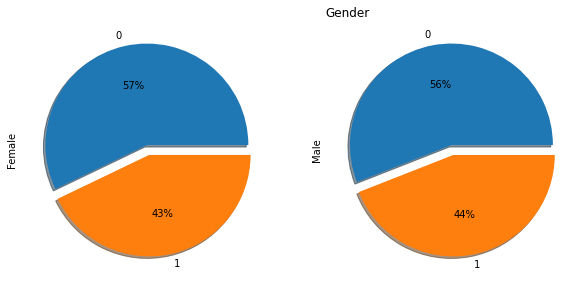

<Figure size 720x720 with 0 Axes>

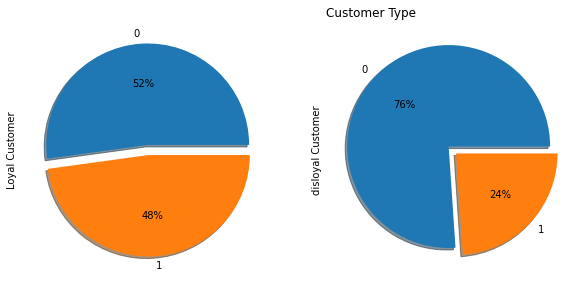

<Figure size 720x720 with 0 Axes>

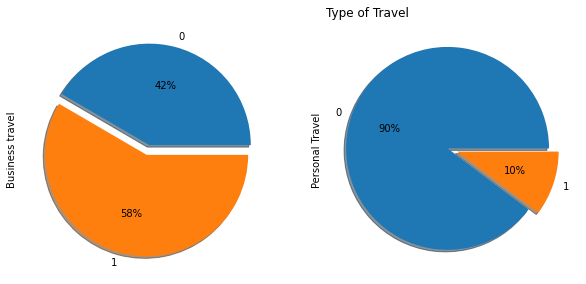

<Figure size 720x720 with 0 Axes>

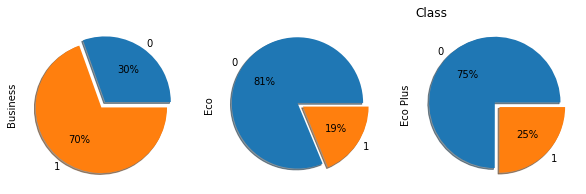

In [115]:
custCategories=["Gender","Customer Type","Type of Travel","Class"]
# data.groupby(["satisfaction","Gender"])["Gender"].count().unstack()

for cust in custCategories:
  # plt.subplot(1,len(custCategories),(custCategories.index(cust))+1)
  space = np.ones(2)/20
  fig=plt.figure(figsize=[10,10])
  data.groupby(["satisfaction",cust])["satisfaction"].count().unstack().plot.pie(subplots=True,explode=space, autopct='%1.0f%%',
                                                                                 shadow = True,legend=False,figsize=[10,10])
  plt.xticks(rotation=90)
  plt.title(cust,loc="left")



### **Correlation Matrix**

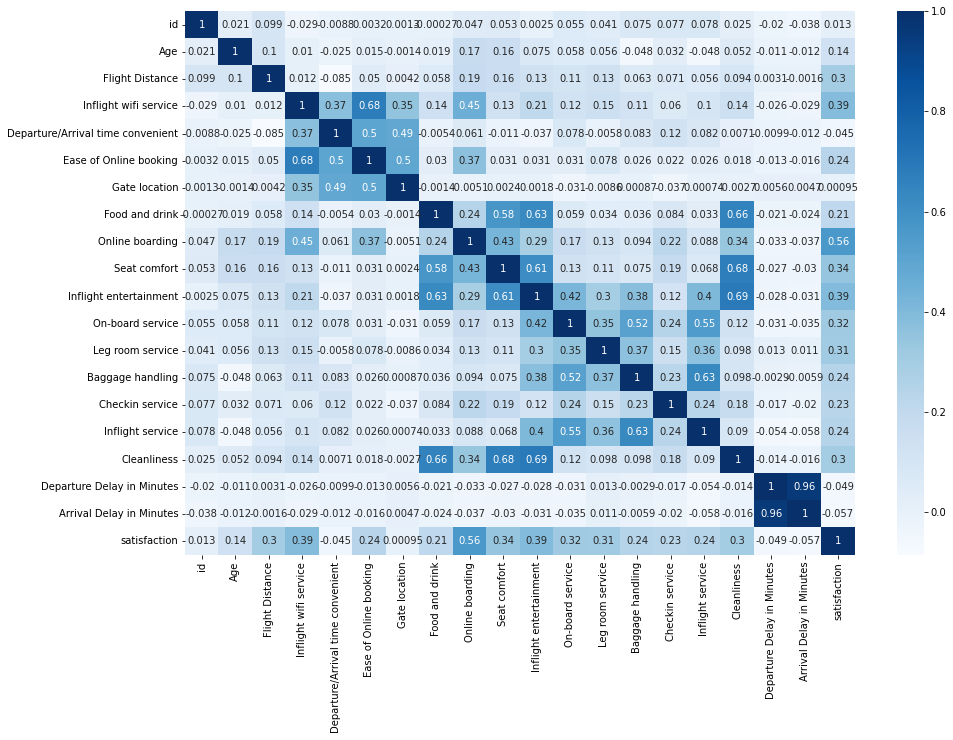

In [116]:
figure=plt.figure(figsize=[15,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor="white")

## **Check Data Imbalance**

In [128]:
data.satisfaction.value_counts()

0    47004
1    36119
Name: satisfaction, dtype: int64

# **7. Data Post-Processing**

### **7.1 Data Preparation / Train Test Split**



In [117]:
#**Remove Irrelavent Features**

data=data.drop(["id"], axis=1)
dataValidationId=dataValidation.id
dataValidation=dataValidation.drop(["id"], axis=1)
X=data.drop("satisfaction",axis=1)
y=data.satisfaction

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=35,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
data.head(5)



(58186, 22)
(58186,)
(24937, 22)
(24937,)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,3,3,...,5,4,5,3,4,4,5,0,0.0,0
1,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,...,2,2,2,2,3,2,3,47,29.0,0
2,Male,disloyal Customer,27,Business travel,Eco,505,3,4,3,4,...,1,5,5,2,3,2,1,0,0.0,1
3,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,...,5,5,5,5,4,5,5,10,2.0,1
4,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,...,2,4,3,5,3,5,2,0,0.0,1


### **7.2 Data Encoding**

- In this section, we will encode our categorical features using one hot encoding.

In [119]:
from sklearn.preprocessing import OneHotEncoder
# Define which columns should be encoded
columns_to_encode=["Gender","Customer Type","Type of Travel","Class"]
# Instantiate encoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded = pd.DataFrame(OH_encoder.fit_transform(X_train[columns_to_encode]),index=X_train.index)
test_encoded = pd.DataFrame(OH_encoder.transform(X_test[columns_to_encode]),index=X_test.index)
validation_encoded = pd.DataFrame(OH_encoder.transform(dataValidation[columns_to_encode]),index=dataValidation.index)

# Adding column names to the encoded data set.
train_encoded.columns = OH_encoder.get_feature_names(columns_to_encode)
test_encoded.columns = OH_encoder.get_feature_names(columns_to_encode)
validation_encoded.columns = OH_encoder.get_feature_names(columns_to_encode)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(columns_to_encode, axis=1)
num_X_test = X_test.drop(columns_to_encode, axis=1)
num_X_valid = dataValidation.drop(columns_to_encode, axis=1)

# Add one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train, train_encoded], axis=1)
X_test = pd.concat([num_X_test, test_encoded], axis=1)
X_validation = pd.concat([num_X_valid, validation_encoded], axis=1)
print(X_train)
print(X_test)
print(X_validation)



       Age  Flight Distance  Inflight wifi service  \
20103   40              129                      4   
29582   60              990                      4   
14304   50              190                      2   
80461   58              460                      4   
33686   26              679                      2   
...    ...              ...                    ...   
51304   72             1129                      1   
48089   85             3732                      3   
68695   22              331                      2   
32765   24             1703                      4   
16481   13              576                      3   

       Departure/Arrival time convenient  Ease of Online booking  \
20103                                  4                       4   
29582                                  5                       4   
14304                                  5                       2   
80461                                  2                       2   
33686      

### **7.2 Data Scaling**

- Tree models dont require Scaling.

# **8. Model Development & Evaluation**

### **Prediction Using Decision Tree**

In [120]:
modelDT=DecisionTreeClassifier(random_state=45)
modelDT.fit(X_train,y_train)

y_train_pred=modelDT.predict(X_train)
y_test_pred=modelDT.predict(X_test)


print("Accuracy Score for Training Data is ", accuracy_score(y_train,y_train_pred))
print("Accuracy Score for Testing Data is ", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for train data is\n",confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix for Test data is \n ", confusion_matrix(y_test, y_test_pred))

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)


Accuracy Score for Training Data is  1.0
Accuracy Score for Testing Data is  0.9388458916469503
Confusion Matrix for train data is
 [[32903     0]
 [    0 25283]]
Confusion Matrix for Test data is 
  [[13299   802]
 [  723 10113]]
                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32903
           1       1.00      1.00      1.00     25283

    accuracy                           1.00     58186
   macro avg       1.00      1.00      1.00     58186
weighted avg       1.00      1.00      1.00     58186

                    Testing Report           
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     14101
           1       0.93      0.93      0.93     10836

    accuracy                           0.94     24937
   macro avg       0.94      0.94      0.94     24937
weighted avg       0.94      0.94      0.94     24937



### **Feature Importance**

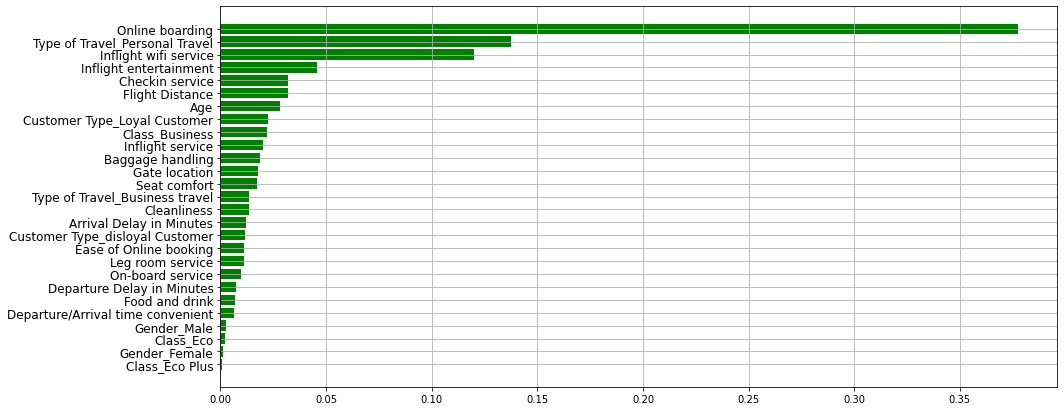

In [121]:
features = X_train.columns
importances = modelDT.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(b=True)
plt.show()

### **Hyperparameter Tuning of Decision Tree using RandomSearchCV**

In [122]:
param_list={
      "criterion" : ["gini","entropy"],
      "splitter":["best","random"],
      "max_depth" : [None,2,3,4,5,6],
      "min_samples_leaf":[1,2,3,4,5],
      "min_samples_split" :[2,3,4,5],
      "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6],
      "max_features":["auto","log2","sqrt",None],
      "max_leaf_nodes":[None,10,20,30,40,50]
      }

modelDTRandCV=RandomizedSearchCV(estimator=modelDT,param_distributions=param_list,cv=3,n_jobs=-1,n_iter=1000,random_state=45)
modelDTRandCV.fit(X_train,y_train)
y_train_pred=modelDTRandCV.predict(X_train)
y_test_pred=modelDTRandCV.predict(X_test)
print("Accuracy Score for Training Data is ", accuracy_score(y_train,y_train_pred))
print("Accuracy Score for Testing Data is ", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for train data is\n",confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix for Test data is \n ", confusion_matrix(y_test, y_test_pred))

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

Accuracy Score for Training Data is  0.9867150173581274
Accuracy Score for Testing Data is  0.9416529654729919
Confusion Matrix for train data is
 [[32746   157]
 [  616 24667]]
Confusion Matrix for Test data is 
  [[13450   651]
 [  804 10032]]
                    Training Report          
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32903
           1       0.99      0.98      0.98     25283

    accuracy                           0.99     58186
   macro avg       0.99      0.99      0.99     58186
weighted avg       0.99      0.99      0.99     58186

                    Testing Report           
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14101
           1       0.94      0.93      0.93     10836

    accuracy                           0.94     24937
   macro avg       0.94      0.94      0.94     24937
weighted avg       0.94      0.94      0.94     24937



### **Build Model-Random Forest**

In [123]:
modelRF=RandomForestClassifier(random_state=45)
modelRF.fit(X_train,y_train)
y_train_pred=modelRF.predict(X_train)
y_test_pred=modelRF.predict(X_test)
print("Accuracy Score for Training Data is ", accuracy_score(y_train,y_train_pred))
print("Accuracy Score for Testing Data is ", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for train datais\n", confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix for Test data is \n ", confusion_matrix(y_test, y_test_pred))

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)



Accuracy Score for Training Data is  0.9999656274705255
Accuracy Score for Testing Data is  0.9562497493684083
Confusion Matrix for train datais
 [[32903     0]
 [    2 25281]]
Confusion Matrix for Test data is 
  [[13724   377]
 [  714 10122]]
                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32903
           1       1.00      1.00      1.00     25283

    accuracy                           1.00     58186
   macro avg       1.00      1.00      1.00     58186
weighted avg       1.00      1.00      1.00     58186

                    Testing Report           
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14101
           1       0.96      0.93      0.95     10836

    accuracy                           0.96     24937
   macro avg       0.96      0.95      0.96     24937
weighted avg       0.96      0.96      0.96     24937



# **9. Summarization and Predict Output for Test File**

In [127]:
X_validation_pred=modelRF.predict(X_validation)
submission = pd.DataFrame({'id':dataValidationId,'satisfaction':X_validation_pred})
submission.satisfaction=submission.satisfaction.replace([0,1],["neutral or dissatisfied","satisfied"])
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>